<a href="https://colab.research.google.com/github/Boadzie/Jupyter-Notebooks/blob/master/Reauter_Newswire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REAUTER NEWSWIRE 

In [0]:
# importing the libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# loading the dataset 
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

In [0]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2, 2, 14, 46, 2, 2, 86, 61, 2, 2, 14, 61, 451, 2, 17, 12]


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
 

In [0]:
 x_train = vectorize_sequences(train_data)
 x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
# Model Difinition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
# Compiling the Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Setting aside a Validatory set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
# Traing the Model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 365us/step - loss: 2.6078 - acc: 0.4870 - val_loss: 1.8245 - val_acc: 0.5780
Epoch 2/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.6343 - acc: 0.6333 - val_loss: 1.4847 - val_acc: 0.6600
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.3624 - acc: 0.7001 - val_loss: 1.3202 - val_acc: 0.7100
Epoch 4/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.1974 - acc: 0.7388 - val_loss: 1.2019 - val_acc: 0.7300
Epoch 5/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.0704 - acc: 0.7681 - val_loss: 1.1229 - val_acc: 0.7530
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.9722 - acc: 0.7840 - val_loss: 1.0752 - val_acc: 0.7630
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.8949 - acc: 0.7985 - val_loss: 1.0342 - val_acc: 0.7640
Epoch 

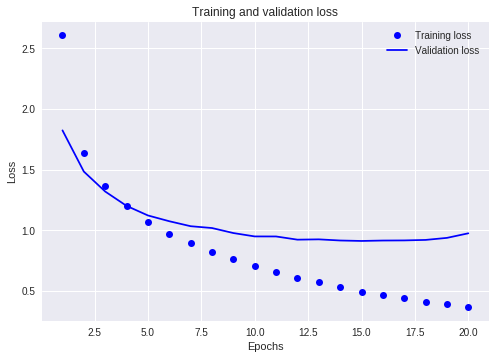

In [0]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

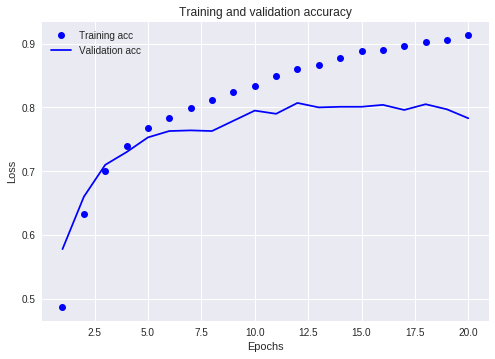

In [0]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Retraining our Model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 98us/step - loss: 2.6550 - acc: 0.4966 - val_loss: 1.8184 - val_acc: 0.6120
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.5919 - acc: 0.6626 - val_loss: 1.4304 - val_acc: 0.6740
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.3025 - acc: 0.7125 - val_loss: 1.2648 - val_acc: 0.7170
Epoch 4/9
7982/7982 [==============================] - 1s 79us/step - loss: 1.1484 - acc: 0.7449 - val_loss: 1.1820 - val_acc: 0.7250
Epoch 5/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.0341 - acc: 0.7714 - val_loss: 1.1039 - val_acc: 0.7510
Epoch 6/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.9456 - acc: 0.7903 - val_loss: 1.0370 - val_acc: 0.7740
Epoch 7/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.8619 - acc: 0.8053 - val_loss: 1.0157 - val_acc: 0.7850
Epoch 8/9
7982

In [0]:
results

[1.0210256544692327, 0.7600178094390027]

In [0]:
# Making Predictions
predictions = model.predict(x_test)

In [0]:
predictions.shape


(2246, 46)